## Connected component  labeling <br>
connected-component analysis, blob extraction or region labeling is an algorithmic application of graph theory. used to determine the connectivity of 'blob' like regions in a binary image. <br>
<br>
The classical approach<br>

ref paper: https://gurus.pyimagesearch.com/wp-content/uploads/2015/08/rosenfeld-1966.pdf

In [1]:
import numpy as np
import imutils
import cv2

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from skimage.filters import threshold_local
from skimage import measure
import numpy as np


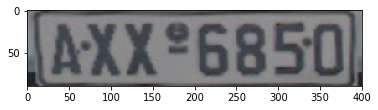

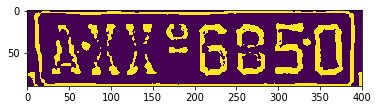

In [7]:
plate = cv2.imread('./data/license_plate.png')

#extract the value component from HSV color space and apply adaptive thresholding to reveal the characters
# on the licnese plate;

V = cv2.split(cv2.cvtColor(plate, cv2.COLOR_BGR2HSV))[2]
T = threshold_local(V, 29, offset=15, method='gaussian')
thresh = ( V < T).astype('uint8') * 255

plt.imshow(plate)
plt.figure()
plt.imshow(thresh)

In [8]:
# perform connected component analysis on the thresholded images and intialize the mask to hold 
# only the 'large' components 

labels = measure.label( thresh, neighbors=8, background=0 )
mask = np.zeros(thresh.shape, dtype='uint8')
#print blobs
print("[INFO] found {} blobs".format(len(np.unique(labels))))

[INFO] found 38 blobs


[INFO] label: 0 (background)


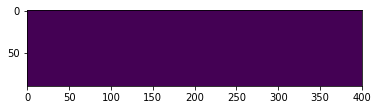

In [17]:
#loop over the unique components
for (i,label) in enumerate(np.unique(labels)):
    #if this is the background label, ignore it;
    if label == 0:
        print("[INFO] label: 0 (background)")
        continue
    #construct the connected componentns for the current label
    print('[INFO] label:{} (foreground)'.format(i))
    labelMask = np.zeros( thresh.shape, dtype='uint8')
    labelMask[labels == label] = 255
    numPixels = cv2.countNonZero(labelMask)
    # if the number of pixels in the component is sufficiently large, add it to our mask of "large" blobs
    if numPixels > 300 and numPixels < 1500:
        mask = cv2.add(mask, labelMask)
        
    plt.figure()
    plt.imshow(labelMask)
    
    
plt.figure()
plt.imshow(mask)

[INFO] found 19 blobs
[INFO] label: 0 (background)
[INFO] label: 1 (foreground)
[INFO] label: 2 (foreground)
[INFO] label: 3 (foreground)
[INFO] label: 4 (foreground)
[INFO] label: 5 (foreground)
[INFO] label: 6 (foreground)
[INFO] label: 7 (foreground)
[INFO] label: 8 (foreground)
[INFO] label: 9 (foreground)
[INFO] label: 10 (foreground)
[INFO] label: 11 (foreground)
[INFO] label: 12 (foreground)
[INFO] label: 13 (foreground)
[INFO] label: 14 (foreground)
[INFO] label: 15 (foreground)
[INFO] label: 16 (foreground)
[INFO] label: 17 (foreground)
[INFO] label: 18 (foreground)


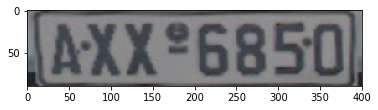

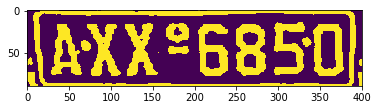

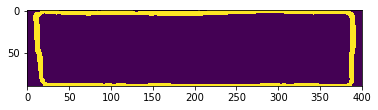

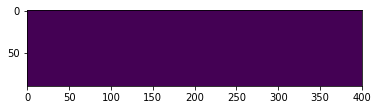

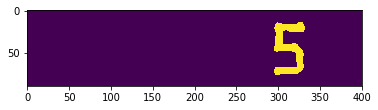

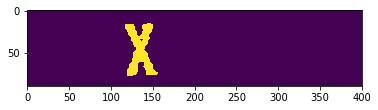

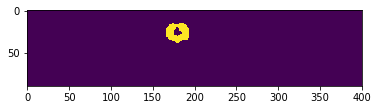

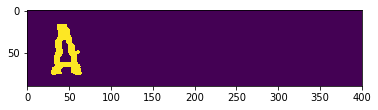

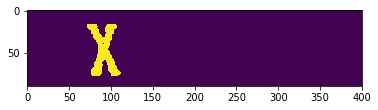

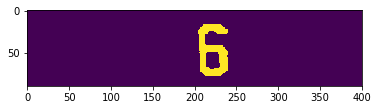

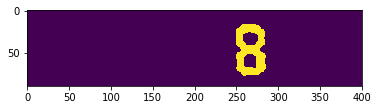

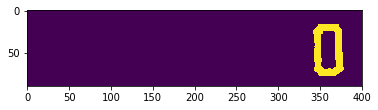

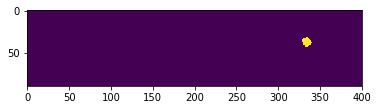

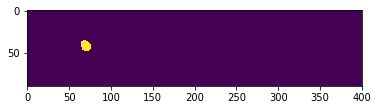

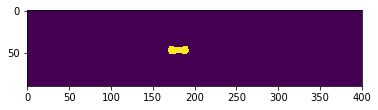

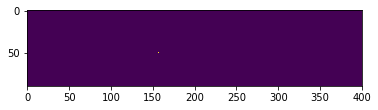

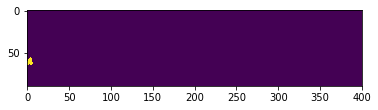

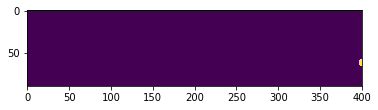

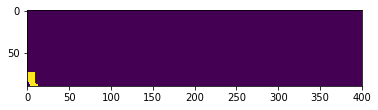

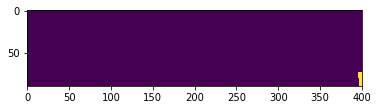

In [14]:
plate = cv2.imread("./data/license_plate.png")

# extract the Value component from the HSV color space and apply adaptive thresholding
# to reveal the characters on the license plate
V = cv2.split(cv2.cvtColor(plate, cv2.COLOR_BGR2HSV))[2]

thresh = cv2.adaptiveThreshold(V, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 17, 3)

# show the images
plt.figure()
plt.imshow( plate)
plt.figure()
plt.imshow(thresh)

# perform connected components analysis on the thresholded images and initialize the
# mask to hold only the "large" components we are interested in
labels = measure.label(thresh, neighbors=8, background=0)
mask = np.zeros(thresh.shape, dtype="uint8")
print("[INFO] found {} blobs".format(len(np.unique(labels))))


# loop over the unique components
for (i, label) in enumerate(np.unique(labels)):
    # if this is the background label, ignore it
    if label == 0:
        print("[INFO] label: 0 (background)")
        continue

    # otherwise, construct the label mask to display only connected components for
    # the current label
    print("[INFO] label: {} (foreground)".format(i))
    labelMask = np.zeros(thresh.shape, dtype="uint8")
    labelMask[labels == label] = 255
    numPixels = cv2.countNonZero(labelMask)
    # if the number of pixels in the component is sufficiently large, add it to our
    # mask of "large" blobs
    if numPixels > 300 and numPixels < 1500:
        mask = cv2.add(mask, labelMask)
        
    plt.figure()
    plt.imshow(labelMask)

        



Total 38 output/blobs